In [65]:
#### ASSIGNMENT 03 - AIDI2000 ####
#### PART 02 - SIMPLE MLP ####

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [23]:
# Load the dataset
data = pd.read_csv('dataset/synthetic_ecommerce_returns.csv')

In [24]:
# Configure pandas to display float numbers with 4 decimal places
pd.set_option('display.float_format', '{:.4f}'.format)

In [25]:
# Drop unnecessary/redundant columns
data = data.drop(columns=['Customer_ID'])

In [26]:
# Analyze categorical columns
categorical_cols = data.select_dtypes(include=['object','category']).columns
print("\nCategorical columns:", list(categorical_cols))


Categorical columns: ['Product_Category', 'Shipping_Method', 'Product_Size', 'Order_Date']


In [27]:
# Remove Order_Date and convert it to Days_Since_First_Order
if 'Order_Date' in categorical_cols:
    categorical_cols = categorical_cols.drop('Order_Date')

if 'Order_Date' in data.columns:
    data['Order_Date'] = pd.to_datetime(data['Order_Date'])
    data['Days_Since_First_Order'] = (data['Order_Date'] - data['Order_Date'].min()).dt.days
    data = data.drop('Order_Date', axis=1) 

print(data.head())

   Purchase_Amount Product_Category Shipping_Method  Delivery_Time_Days  \
0          46.9300             Home         Express                   4   
1         301.0100             Home        Standard                   5   
2         131.6700           Beauty       Overnight                   7   
3          91.2900             Home         Express                   6   
4          16.9600           Sports         Express                   4   

   Customer_Review_Score Product_Size  Discount_Applied  Return_Status  \
0                 4.6000        Small                 0              0   
1                 2.6000       Medium                 0              0   
2                 3.7000        Small                 1              0   
3                 3.8000       Medium                 1              0   
4                 5.0000        Large                 0              0   

   Days_Since_First_Order  
0                     188  
1                     207  
2                   

In [28]:
# Encode categorical variables
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    print(f"Encoded {col} with {len(le.classes_)} unique values")

Encoded Product_Category with 5 unique values
Encoded Shipping_Method with 4 unique values
Encoded Product_Size with 3 unique values


In [29]:
# Separate features and target
X = data.drop('Return_Status', axis=1)
y = data['Return_Status']

In [32]:
X.head(), y.head()

(   Purchase_Amount  Product_Category  Shipping_Method  Delivery_Time_Days  \
 0          46.9300                 3                0                   4   
 1         301.0100                 3                2                   5   
 2         131.6700                 0                1                   7   
 3          91.2900                 3                0                   6   
 4          16.9600                 4                0                   4   
 
    Customer_Review_Score  Product_Size  Discount_Applied  \
 0                 4.6000             2                 0   
 1                 2.6000             1                 0   
 2                 3.7000             2                 1   
 3                 3.8000             1                 1   
 4                 5.0000             0                 0   
 
    Days_Since_First_Order  
 0                     188  
 1                     207  
 2                     327  
 3                      25  
 4               

In [31]:
# Normalize numerical features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [34]:
X_scaled

array([[0.05742499, 0.75      , 0.        , ..., 1.        , 0.        ,
        0.51506849],
       [0.36832509, 0.75      , 0.66666667, ..., 0.5       , 0.        ,
        0.56712329],
       [0.16111546, 0.        , 0.33333333, ..., 1.        , 1.        ,
        0.89589041],
       ...,
       [0.04861485, 0.        , 0.33333333, ..., 1.        , 0.        ,
        0.49041096],
       [0.20696491, 0.25      , 0.33333333, ..., 0.        , 0.        ,
        0.51506849],
       [0.11130145, 0.25      , 0.33333333, ..., 0.        , 0.        ,
        0.        ]])

In [35]:
# Split data into train, validation, and test sets (70%, 15%, 15%)
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

In [52]:
# Build the neural network model
print("\nBuilding neural network model...")
model = Sequential([
    keras.Input(shape=(X_train.shape[1],)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])


Building neural network model...


In [ ]:
# Train the model with validation split
print("\nTraining the neural network...")
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_val, y_val),
    verbose=1
)


Training the neural network...
Epoch 1/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6011 - loss: 0.6682 - val_accuracy: 0.7267 - val_loss: 0.6416
Epoch 2/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 804us/step - accuracy: 0.7843 - loss: 0.6236 - val_accuracy: 0.8347 - val_loss: 0.6002
Epoch 3/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 794us/step - accuracy: 0.8379 - loss: 0.5837 - val_accuracy: 0.8453 - val_loss: 0.5639
Epoch 4/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 880us/step - accuracy: 0.8572 - loss: 0.5433 - val_accuracy: 0.8467 - val_loss: 0.5329
Epoch 5/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 953us/step - accuracy: 0.8513 - loss: 0.5178 - val_accuracy: 0.8467 - val_loss: 0.5071
Epoch 6/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 929us/step - accuracy: 0.8513 - loss: 0.4958 - val_accuracy: 0.8467 - val_loss: 0.4868
Epoch 7/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8543 - loss: 0.4715 - val_accuracy: 0.8467 - val_loss: 0.4711
Epoch 8/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 862us/step - accura

In [54]:
# Display model summary
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 485 (1.90 KB)

 Trainable params: 161 (644.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 324 (1.27 KB)

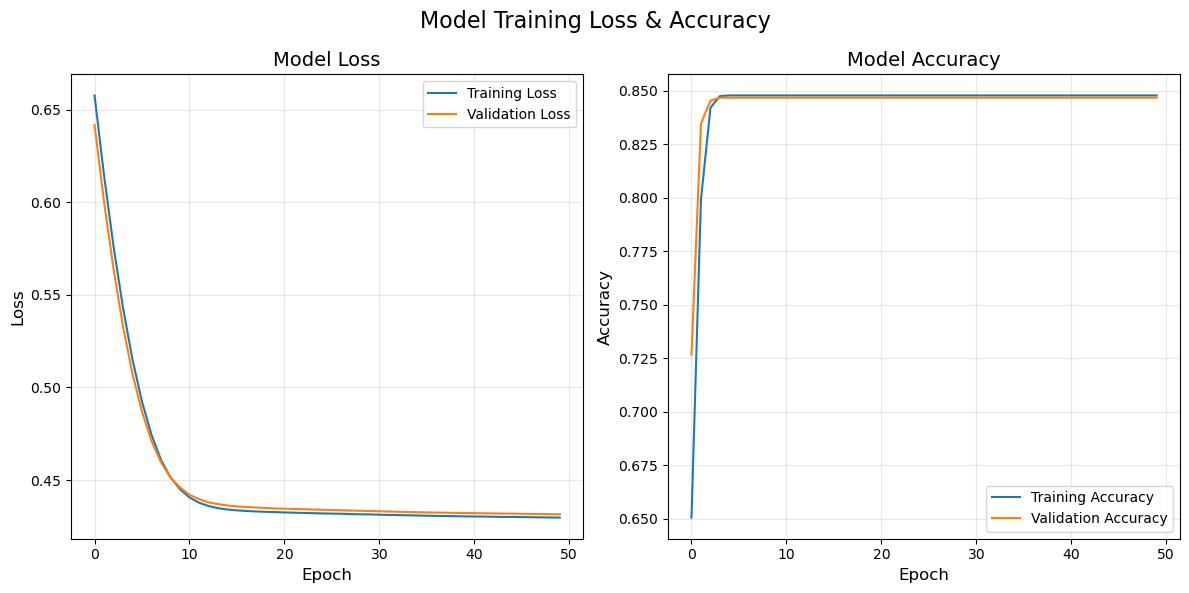

In [63]:
# Visualization 11 - Training Loss & Accuracy
plt.figure(figsize=(12, 6))
plt.suptitle('Model Training Loss & Accuracy', fontsize=16)

# Loss subplot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss', fontsize=14)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)

# Accuracy subplot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy', fontsize=14)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [56]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Loss: 0.4304
Test Accuracy: 0.8480


In [57]:
# Make predictions on test set
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [59]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       636
           1       0.00      0.00      0.00       114

    accuracy                           0.85       750
   macro avg       0.42      0.50      0.46       750
weighted avg       0.72      0.85      0.78       750



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


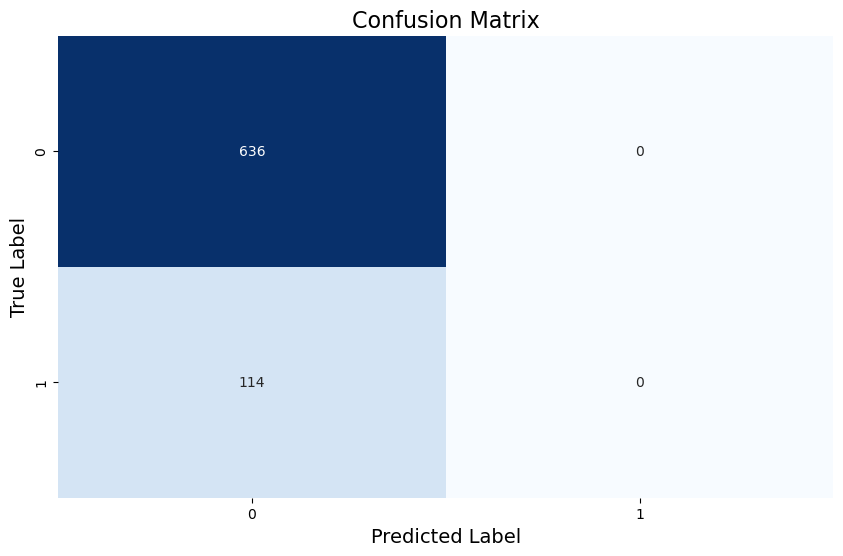

In [ ]:
# Visualization 12 - Confusion Matrix
plt.figure(figsize=(12, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.show()

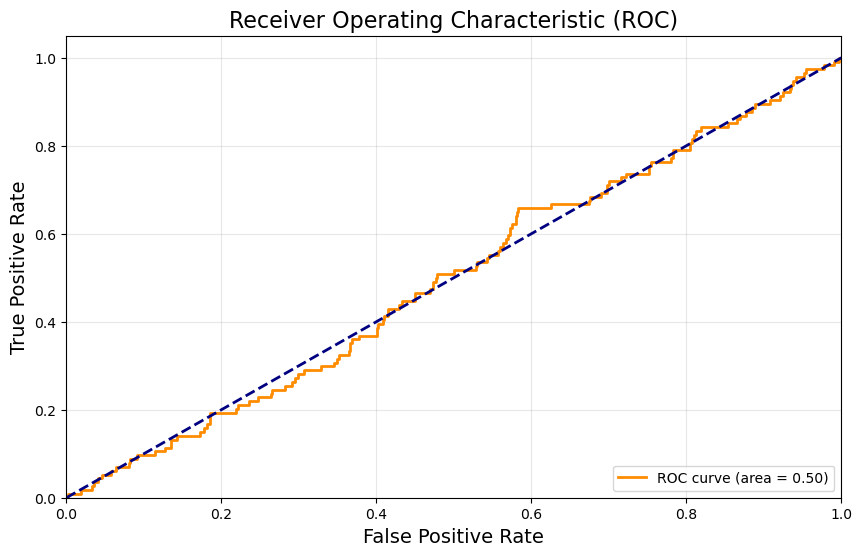

In [ ]:
# Visualization 13 - ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Receiver Operating Characteristic (ROC)', fontsize=16)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()